# Dimensionality Reduction

In this exercise, we will use principal component analysis to perform dimensionality reduction on our dataset. Recall that the `netml` library has mechanisms to extract a wide range of statistics from traffic flows. We will start with those (an N-dimensional feature set), and then use principal component analysis to reduce the dimensionality of the data.

In [1]:
import logging
logging.getLogger("scapy.runtime").setLevel(logging.ERROR)

from netml.pparser.parser import PCAP

import pandas as pd

## Load the Packet Capture Files

Load the Log4j and HTTP packet capture files and extract features from the flows. You can feel free to compute features manually, although it will likely be more convenient at this point to use the `netML` library.

## Convert the Packet Capture Into Flows

Find the function in `netml` that converts the pcap file into flows. Examing the resulting data structure. What does it contain?

## Explore the Flows

How many flows are in each of these pcaps? (Use the `netml` library output to determine the size of each data structure.)

## Try Your Data on a Tree-Based Model

You should now have data that can be input into a model with scikit-learn. Import the scikit-learn package (`sklearn`) and a classification model of your choice to test that you can train your model with the above data. 

Hint: The function you want to call is `fit`.

Before applying dimensionality reduction, we can first build on our understanding of classifiers from past notebooks to see which features may be most important. 

Let's try training a model first with a **Decision Tree**, then with a RandomForest classifier, which gives us nice ways of exploring feature importance.

### Decision Tree

Train a decision tree below.

### Visualize the Resulting Model

Below is an example showing how the resulting decision tree can be visualized. We kept the number of features small above to make visualization quick. You may need to install some dependencies (pydotplus, plus the graphviz executable, to get this cell to run.

To install graphviz on a Mac, for example, you can use a tool like Homebrew (e.g., brew install graphviz).

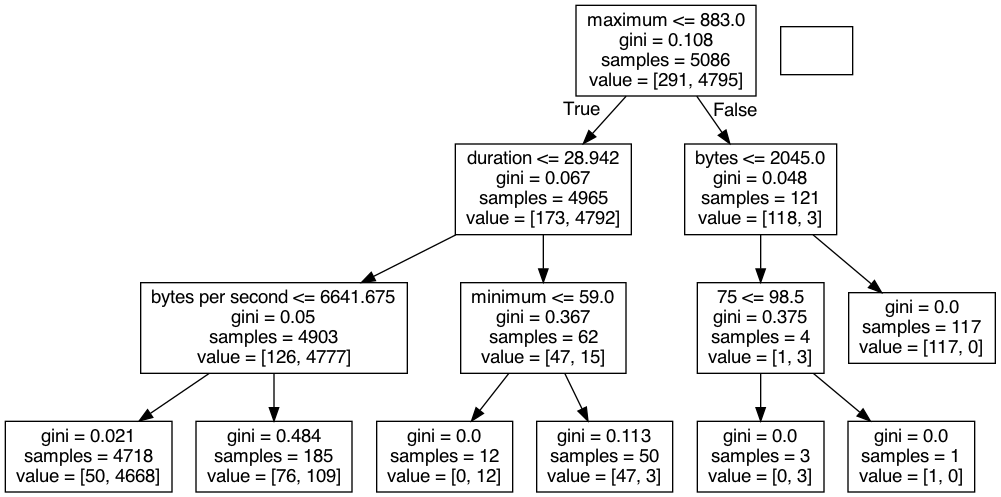

In [92]:
from sklearn import tree
import pydotplus
from IPython.display import Image

labels = ['duration', 'packets per second', 
          'bytes per second', 
          'mean', 'standard deviation', 
          '25', 'median', '75', 
          'minimum', 'maximum',
          'packets','bytes']

dot_data = tree.export_graphviz(dt, out_file=None, feature_names=labels)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Evaluate the Model

We can look at the accuracy of this simple model using a K-Fold cross validation and accuracy score.

## Random Forest Classifiers
Random forest improves on a decision tree classifier using an ensemble learning method called bagging. In a random forest, 

1. many decision trees are trained. Each tree receives a boostrapped sample of observations, and
2. each node only considers a subset of the features when determining the best split.

The balanced mode, which we use below, uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

### Train a Random Forest Classifier

Train a random forest classifier using the same approach as you used for the decision tree.

### Evaluate Your Classifier

Evaluate your random forest classifier using the same evaluation method as for the decision tree.  Does accuracy improve?

## Feature Importance

One of the powerful aspects of a random forest classifier is that it is easy to plot and understand feature importance. The feature_importances_ data structure maintains these relative feature importance values, which we can plot and visualize.

## Dimensionality Reduction

One way to reduce the dimensionality of a dataset is with a technique called principal components analysis (PCA). PCA is a linear transformation that maps the points into a space where the lower dimensions are orthogonal and also capture the highest variance in the dataset.

So, the first principal component (PC1) is a vector that is oriented in the direction that captures the highest variance in the dataset. You can think of this as the single dimension that has the most information in the dataset. PC2 captures the next highest variance, in the direction that is orthogonal to PC2, and so forth.

There are many applications of PCA, but one application is the visualization of a high-dimension dataset, since PCA is just a transformation of the data that does not inherently lose information. When we only project into the top two dimensions, some information is lost (whatever is in the lower principal compoenents), but we can visualize the data in terms of the two dimensions that capture the most "information" (i.e., variance) in the dataset.

### Evaluate the Lower Dimension Model

Evaluate the accuracy of the lower dimensionality model trained on the random forest classifier in the same fashion as above. What happens to the accuracy? Why?

What might be a good reason to reduce the dimensionality of the dataset?